In [1]:
# %matplotlib qt 
# %matplotlib inline

import typing as T
import numpy as np
from matplotlib import pyplot as plt
from util import timeit, YAY, INFO, ERROR, WARN

from gcs_as_a_policy import plot_policy_realizations_from_state, make_a_path_from_policy
from gcs_as_a_policy import LEAST_SQUARES_POLICY, QP_POLICY
from good_LQR_unit_test import make_a_simple_lqr_test
from mpc_test import make_a_simple_mpc_test, make_a_bigger_mpc_test

def state(x,y):
    return np.array([x,0,y,0])

dt = 0.2
initial_states = [ state(5.5,4.5), state(4.5,5.5), state(5,5.5), state(5.5,5)] #, state(3.5 ,5.5), state(5.5,3.5) ]

xlim = [0,6]
ylim = [0,6]
N = 15
# make more sets
# what are the costs incurred by each policy?

vertices, edges, solution = make_a_bigger_mpc_test(N = N, verbose = False, dt = dt, lqr_policy = False, push_up_only_at_0 = True)

1.556s since last time-check
SolutionResult.kSolutionFound


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_51810/2530193958.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_51810/2530193958.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


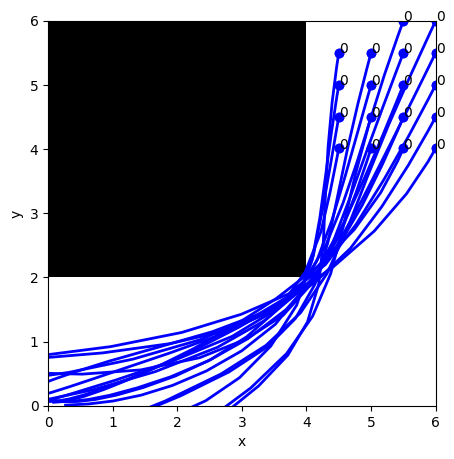

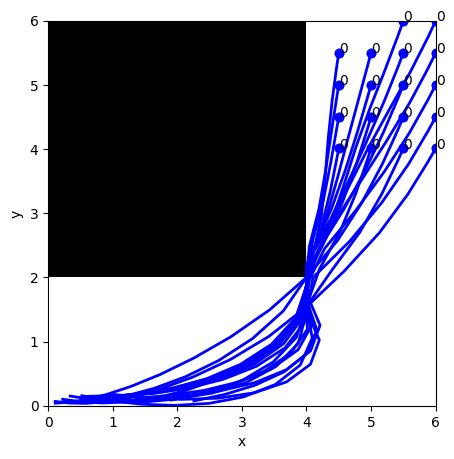

In [4]:
initial_states = [
    state(4.5, 4.01), state(4.5, 4.5), state(4.5, 5),state(4.5, 5.5),# state(4.5, 6),
    state(5, 4.01), state(5,4.5), state(5,5), state(5,5.5), #state(5,6), 
    state(5.5, 4.01), state(5.5,4.5), state(5.5,5), state(5.5,5.5), state(5.5,6), 
    state(6, 4.01), state(6,4.5), state(6,5), state(6,5.5), state(6,6), 
 ]
# initial_states = [
#     state(4.5, 4.01)
#  ]

fig, ax, costs_ls = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, LEAST_SQUARES_POLICY, False, xlim, ylim, with_replacement = False)
fig.show()
fig, ax, costs_qp = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, False, xlim, ylim, with_replacement = False)
fig.show()

0.161s since last time-check
SolutionResult.kSolutionFound


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_51810/672272433.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


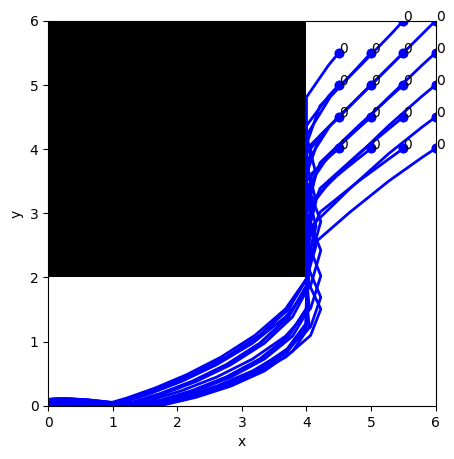

In [3]:

vertices_dumb, edges_dumb, solution_dumb = make_a_bigger_mpc_test(N = N, verbose = False, dt = dt, lqr_policy = True)
# fig, ax, costs_lqr = plot_policy_realizations_from_state(vertices_dumb, edges_dumb, solution_dumb, initial_states, LEAST_SQUARES_POLICY, True, xlim, ylim, with_replacement = True)
fig, ax, costs_lqr = plot_policy_realizations_from_state(vertices_dumb, edges_dumb, solution_dumb, initial_states, QP_POLICY, True, xlim, ylim, with_replacement = True)
fig.show()
# plt.grid()



In [5]:

rat_ls_lqr = np.array([costs_ls[i] / costs_lqr[i] for i in range(len(costs_lqr))])
rat_qp_lqr = np.array([costs_qp[i] / costs_lqr[i] for i in range(len(costs_lqr))])
print(np.mean(rat_ls_lqr))
print(np.mean(rat_qp_lqr))


0.7153166842753138
0.80861640968634


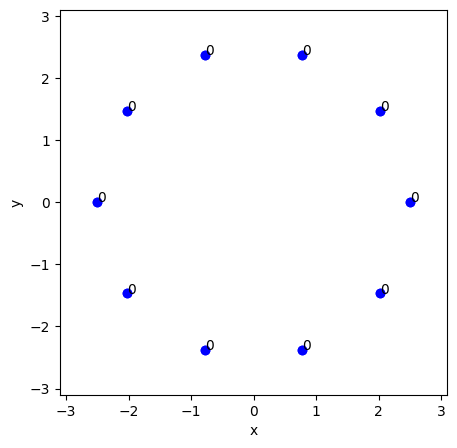

In [3]:
xlim = [-3.1,3.1]
ylim = [-3.1,3.1]
initial_states = []
for i in range(10):
    r = 2.5
    initial_states.append( state( r*np.cos(i*2*np.pi/10), r*np.sin(i*2*np.pi/10) ) )

# vertices_lqr, edges_lqr, solution_lqr = make_a_simple_lqr_test(N= 10, dt = dt)
# print(vertices_lqr)
# print(edges_lqr)
fig, ax, costs_lqr = plot_policy_realizations_from_state(vertices_dumb, edges_dumb, solution_dumb, initial_states, LEAST_SQUARES_POLICY, True, xlim, ylim, with_replacement = False)

In [11]:
a = np.array([[1, 2], [3, 1]])
b = np.array([[5, 7], [7, 9]])
print(a@b)
print(a.dot(b))

[[19 25]
 [22 30]]
[[19 25]
 [22 30]]


In [ ]:
def state(x,y):
    return np.array([x,0,y,0])

dt = 0.2
# initial_states = [ state(5,5), state(5.5,4.5), state(4.5,5.5), state(5.5,3.8), state(3.8,5.5), state(5.5,3), state(3,5.5)] #, state(3.5 ,5.5), state(5.5,3.5) ]
# initial_states = [ state(3,5)] #, state(3.5 ,5.5), state(5.5,3.5) ]
initial_states = [ state(5.5,4.5), state(4.5,5.5), state(5,5.5), state(5.5,5)] #, state(3.5 ,5.5), state(5.5,3.5) ]
# initial_states = [ state(3.5 ,5.5), state(5.5,3.5) ]
# initial_states = [ state(5,5.5)] #, state(3.5 ,5.5), state(5.5,3.5) ]
xlim = [0,6]
ylim = [0,6]
N = 10
# make more sets
# what are the costs incurred by each policy?

vertices, edges, solution = make_a_bigger_mpc_test(N = N, verbose = False, dt = dt, lqr_policy = False)
# vertices, edges, solution = make_a_simple_mpc_test(N = N, verbose = False, dt = dt, lqr_policy = False)
fig, ax, costs = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, True, xlim, ylim, with_replacement = True)
YAY(costs)